In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['58MA','total'])
    lista_twt2.append(twt_ods[date].loc['156B','total'])
    lista_twt3.append(twt_ods[date].loc['34CZ','total'])
    lista_twt4.append(twt_ods[date].loc['165V','total'])
    lista_twt5.append(twt_ods[date].loc['13VI','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['58MA','total'])
    lista_ine2.append(ine_ods[date].loc['156B','total'])
    lista_ine3.append(ine_ods[date].loc['34CZ','total'])
    lista_ine4.append(ine_ods[date].loc['165V','total'])
    lista_ine5.append(ine_ods[date].loc['13VI','total'])


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,11
2020-04-02,3
2020-04-03,14
2020-04-04,5
2020-04-05,13


In [10]:
df_ine.head()

,Viajes
2020-04-01,16278
2020-04-02,16895
2020-04-03,18153
2020-04-04,13180
2020-04-05,11805


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,17.518519
std,8.148790
min,0.000000
25%,11.000000
50%,16.000000
75%,24.000000
max,34.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,30777.061728
std,13658.229593
min,10416.000000
25%,18843.000000
50%,30457.000000
75%,42480.000000
max,55828.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,11.033333
2020-05-31,20.258065
2020-06-30,23.000000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,18261.733333
2020-05-31,32278.387097
2020-06-30,47223.000000


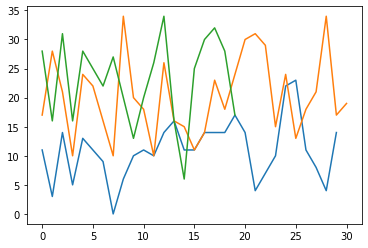

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

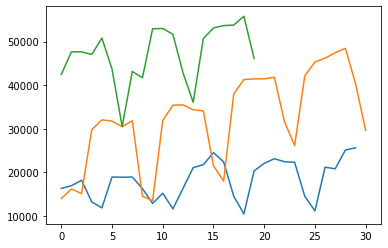

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
# cantidad de dias previos que se usaran para predecir el siguiente dia 
look_back=7

# convertir series en conocimiento supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # secuencia de entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # secuencia del pronostico (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # unimos todo
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # eliminamos todos los valores nulos
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# cargamos el dataframe en la variable values
values_twt = df_twt.values
values_ine = df_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
values_twt=values_twt.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
values_ine=values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_twt = scaler.fit_transform(values_twt)
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

#imprimimos los nuevos datos
reframed_twt.tail()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
76,0.176471,-0.235294,0.176471,0.529412,1.000000,-0.058824,-0.647059,0.470588
77,-0.235294,0.176471,0.529412,1.000000,-0.058824,-0.647059,0.470588,0.764706
78,0.176471,0.529412,1.000000,-0.058824,-0.647059,0.470588,0.764706,0.882353
79,0.529412,1.000000,-0.058824,-0.647059,0.470588,0.764706,0.882353,0.647059
80,1.000000,-0.058824,-0.647059,0.470588,0.764706,0.882353,0.647059,0.000000


In [22]:
#cambiamos el nombre de las columnas
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)', 'var2(t)']
reframed_ine.tail()

,var2(t-7),var2(t-6),var2(t-5),var2(t-4),var2(t-3),var2(t-2),var2(t-1),var2(t)
76,0.377698,0.872853,0.876464,0.817185,0.426715,0.129569,0.774113,0.881133
77,0.872853,0.876464,0.817185,0.426715,0.129569,0.774113,0.881133,0.905576
78,0.876464,0.817185,0.426715,0.129569,0.774113,0.881133,0.905576,0.910684
79,0.817185,0.426715,0.129569,0.774113,0.881133,0.905576,0.910684,1.000000
80,0.426715,0.129569,0.774113,0.881133,0.905576,0.910684,1.000000,0.573417


In [23]:
#unimos los datos del ine con los de twitter
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)
    
reframed = pd.concat([reframed, reframed_ine.iloc[:, 7]], axis=1)

reframed.tail()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var2(t)
76,0.176471,0.377698,-0.235294,0.872853,0.176471,0.876464,0.529412,0.817185,1.000000,0.426715,-0.058824,0.129569,-0.647059,0.774113,0.881133
77,-0.235294,0.872853,0.176471,0.876464,0.529412,0.817185,1.000000,0.426715,-0.058824,0.129569,-0.647059,0.774113,0.470588,0.881133,0.905576
78,0.176471,0.876464,0.529412,0.817185,1.000000,0.426715,-0.058824,0.129569,-0.647059,0.774113,0.470588,0.881133,0.764706,0.905576,0.910684
79,0.529412,0.817185,1.000000,0.426715,-0.058824,0.129569,-0.647059,0.774113,0.470588,0.881133,0.764706,0.905576,0.882353,0.910684,1.000000
80,1.000000,0.426715,-0.058824,0.129569,-0.647059,0.774113,0.470588,0.881133,0.764706,0.905576,0.882353,0.910684,0.647059,1.000000,0.573417


# Dividimos los datos en sets de entrenamiento y validacion

In [24]:
#dividimos nuestro valores entre sets de entrenamiento y de test
values = reframed.values
n_train_days = 71 - (10+look_back)
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(54, 1, 14) (54,) (20, 1, 14) (20,)


# Creamos la red neuronal

In [25]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(look_back, input_shape=(1,look_back*2),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [26]:
EPOCHS=200

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=look_back)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 7)              105       
_________________________________________________________________
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

8/8 [==============================] - 0s 6ms/step - loss: 0.1836 - mse: 0.0640 - val_loss: 0.2760 - val_mse: 0.1101
Epoch 51/200
8/8 [==============================] - 0s 6ms/step - loss: 0.2425 - mse: 0.0997 - val_loss: 0.2507 - val_mse: 0.0858
Epoch 52/200
8/8 [==============================] - 0s 6ms/step - loss: 0.2454 - mse: 0.0903 - val_loss: 0.2477 - val_mse: 0.0835
Epoch 53/200
8/8 [==============================] - 0s 6ms/step - loss: 0.2209 - mse: 0.0773 - val_loss: 0.2381 - val_mse: 0.0766
Epoch 54/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1765 - mse: 0.0530 - val_loss: 0.2521 - val_mse: 0.0881
Epoch 55/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1978 - mse: 0.0724 - val_loss: 0.2458 - val_mse: 0.0907
Epoch 56/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1997 - mse: 0.0701 - val_loss: 0.2718 - val_mse: 0.1148
Epoch 57/200
8/8 [==============================] - 0s 6ms/step - loss: 0.2191 - mse: 0.0736 - val_loss

8/8 [==============================] - 0s 6ms/step - loss: 0.1763 - mse: 0.0484 - val_loss: 0.1511 - val_mse: 0.0302
Epoch 114/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1571 - mse: 0.0379 - val_loss: 0.1520 - val_mse: 0.0314
Epoch 115/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1550 - mse: 0.0373 - val_loss: 0.1502 - val_mse: 0.0302
Epoch 116/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1425 - mse: 0.0322 - val_loss: 0.1406 - val_mse: 0.0290
Epoch 117/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1561 - mse: 0.0373 - val_loss: 0.1516 - val_mse: 0.0344
Epoch 118/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1345 - mse: 0.0302 - val_loss: 0.1468 - val_mse: 0.0321
Epoch 119/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1231 - mse: 0.0240 - val_loss: 0.1463 - val_mse: 0.0319
Epoch 120/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1357 - mse: 0.0319 - v

8/8 [==============================] - 0s 7ms/step - loss: 0.1258 - mse: 0.0305 - val_loss: 0.1417 - val_mse: 0.0300
Epoch 176/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1156 - mse: 0.0226 - val_loss: 0.1457 - val_mse: 0.0299
Epoch 177/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1559 - mse: 0.0388 - val_loss: 0.1522 - val_mse: 0.0296
Epoch 178/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1217 - mse: 0.0233 - val_loss: 0.1454 - val_mse: 0.0344
Epoch 179/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1367 - mse: 0.0288 - val_loss: 0.1462 - val_mse: 0.0280
Epoch 180/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1059 - mse: 0.0190 - val_loss: 0.1691 - val_mse: 0.0407
Epoch 181/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1345 - mse: 0.0297 - val_loss: 0.1617 - val_mse: 0.0338
Epoch 182/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1343 - mse: 0.0317 - v

# Visualizamos resultados

In [27]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [28]:
# hacemos las predicciones
trainPredict = model.predict(x_train)
testPredict = model.predict(x_val)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = y_train.reshape(y_train.shape[0], 1)
trainY_scalerInverse = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = y_val.reshape(y_val.shape[0], 1)
testY_scalerInverse = scaler.inverse_transform(testY)

In [29]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse, trainPredict)
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse, testPredict)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 2433.89 MAE
Resultado del entrenamiento: 11741070.00 MSE
Resultado del entrenamiento: 3426.52 RMSE
Resultado del entrenamiento: 12.90 CVRMSE
Resultado del entrenamiento: 11.09 MAPE 

Resultado del test: 3444.17 MAE
Resultado del test: 15312192.00 MSE
Resultado del test: 3913.08 RMSE
Resultado del test: 8.29 CVRMSE
Resultado del test: 7.45 MAPE


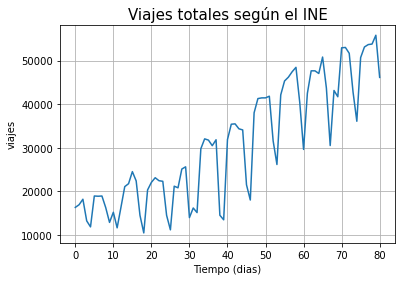

In [30]:
plt.plot(df_ine.values)
plt.grid(True)
plt.title("Viajes totales según el INE", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

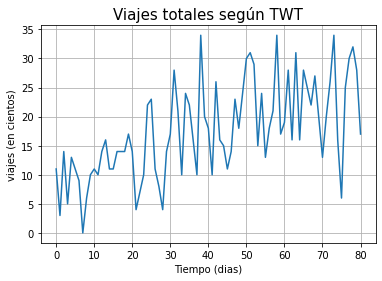

In [31]:
plt.plot(df_twt.values)
plt.grid(True)
plt.title("Viajes totales según TWT", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en cientos)", fontsize = 10)
plt.show()

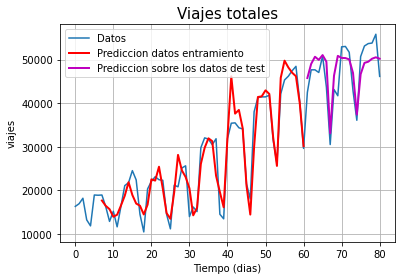

In [32]:
dataset = df_ine.values
dataset = dataset.astype('float32')
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset), :] = testPredict
# plot baseline and predictions
plt.plot(df_ine.values)
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.show()

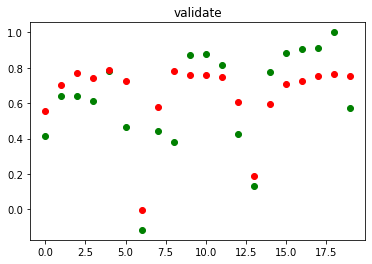

In [33]:
results=model.predict(x_val)

plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

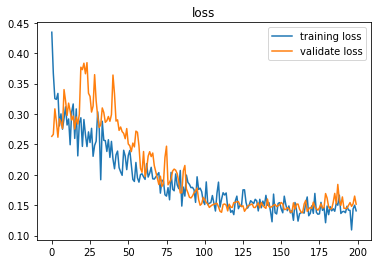

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

# Prediccion a futuro

In [35]:
# usaremos los 14 ultimos dias del confinamiento en junio para predecir como habrian sido los dias del 21 al 27 en caso de que
# el confinamiento se hubiese alargado por una semana mas

ultimosDias_twt = df_twt['2020-6-7':'2020-6-20']
ultimosDias_ine = df_ine['2020-6-7':'2020-6-20']
ultimosDias_twt

,Viajes
2020-06-07,22
2020-06-08,27
2020-06-09,20
2020-06-10,13
2020-06-11,20
2020-06-12,26
2020-06-13,34
2020-06-14,16
2020-06-15,6
2020-06-16,25


# Preparamos los datos para el test

In [36]:
# cargamos el dataframe en la variable values
values_twt = ultimosDias_twt.values
values_ine = ultimosDias_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
values_twt =values_twt.reshape(-1, 1)
scaled_twt = scaler.fit_transform(values_twt)
values_ine =values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

# eliminamos la ultima columna pues es parte de lo que queremos hayar
reframed_twt.drop(reframed_twt.columns[[7]], inplace=True, axis=1)
reframed_ine.drop(reframed_ine.columns[[7]], inplace=True, axis=1)

#unimos los dataframes
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)']
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)

#mostramos el set de entrenamiento
reframed.head(7)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
7,0.142857,-1.000000,0.500000,-0.001815,0.000000,-0.115321,-0.500000,0.772121,0.000000,0.778593,0.428571,0.672350,1.000000,-0.027468
8,0.500000,-0.001815,0.000000,-0.115321,-0.500000,0.772121,0.000000,0.778593,0.428571,0.672350,1.000000,-0.027468,-0.285714,-0.560028
9,0.000000,-0.115321,-0.500000,0.772121,0.000000,0.778593,0.428571,0.672350,1.000000,-0.027468,-0.285714,-0.560028,-1.000000,0.595154
10,-0.500000,0.772121,0.000000,0.778593,0.428571,0.672350,1.000000,-0.027468,-0.285714,-0.560028,-1.000000,0.595154,0.357143,0.786960
11,0.000000,0.778593,0.428571,0.672350,1.000000,-0.027468,-0.285714,-0.560028,-1.000000,0.595154,0.357143,0.786960,0.714286,0.830768
12,0.428571,0.672350,1.000000,-0.027468,-0.285714,-0.560028,-1.000000,0.595154,0.357143,0.786960,0.714286,0.830768,0.857143,0.839924
13,1.000000,-0.027468,-0.285714,-0.560028,-1.000000,0.595154,0.357143,0.786960,0.714286,0.830768,0.857143,0.839924,0.571429,1.000000


In [37]:
values = reframed.values

#tomamos los valores para realizar el test
x_test = values[6:, :]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 14)


array([[[ 1.        , -0.02746844, -0.28571427, -0.5600283 ,
         -1.        ,  0.59515357,  0.35714293,  0.78696036,
          0.71428585,  0.83076787,  0.8571429 ,  0.8399241 ,
          0.57142854,  1.0000002 ]]], dtype=float32)

In [38]:
#definimos la funcion para realizar el desplazamiento que se hara en el array cada prediccion pues para hacer
#la siguiente prediccion eliminamos el dia mas antiguo, desplazamos un lugar el resto de dias y añadimos el ultimo dia que
#se ha predecido, esto es por que para predecir un dia se usan los 7 dias previos

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

# Predicciones para la proxima semana

In [39]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 1.         -0.02746844 -0.28571427 -0.5600283  -1.
    0.59515357  0.35714293  0.78696036  0.71428585  0.83076787
    0.8571429   0.8399241   0.57142854  1.0000002 ]]]
[[[-0.02746844 -0.28571427 -0.5600283  -1.          0.59515357
    0.35714293  0.78696036  0.71428585  0.83076787  0.8571429
    0.8399241   0.57142854  1.0000002   0.5240054 ]]]
[[[-0.28571427 -0.5600283  -1.          0.59515357  0.35714293
    0.78696036  0.71428585  0.83076787  0.8571429   0.8399241
    0.57142854  1.0000002   0.5240054   0.41022328]]]
[[[-0.5600283  -1.          0.59515357  0.35714293  0.78696036
    0.71428585  0.83076787  0.8571429   0.8399241   0.57142854
    1.0000002   0.5240054   0.41022328 -0.15058617]]]
[[[-1.          0.59515357  0.35714293  0.78696036  0.71428585
    0.83076787  0.8571429   0.8399241   0.57142854  1.0000002
    0.5240054   0.41022328 -0.15058617 -0.5587309 ]]]
[[[ 0.59515357  0.35714293  0.78696036  0.71428585  0.83076787
    0.8571429   0.8399241   0.57142854  1.000000

# Re-Convertimos los resultados

In [40]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([0.5240054], dtype=float32), array([0.41022328], dtype=float32), array([-0.15058617], dtype=float32), array([-0.5587309], dtype=float32), array([0.52223796], dtype=float32), array([0.71847886], dtype=float32), array([0.82101077], dtype=float32)]


array([[49797.62363952],
       [48356.11769834],
       [41251.22260232],
       [36080.43690981],
       [49775.23173211],
       [52261.40778701],
       [53560.38458968]])

# Visualizamos el pronostico

<AxesSubplot:>

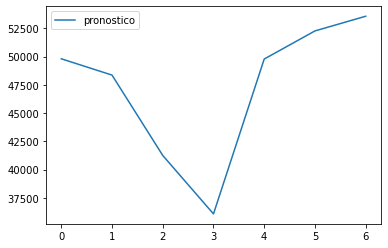

In [41]:
prediccion = pd.DataFrame(inverted)
prediccion.columns = ['pronostico']
prediccion.plot()

# Prediccion con datos actuales

In [42]:
# usaremos 14 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-11':'2020-5-24']
Dias_ine = df_ine['2020-5-11':'2020-5-24']
Dias_twt

,Viajes
2020-05-11,18
2020-05-12,10
2020-05-13,26
2020-05-14,16
2020-05-15,15
2020-05-16,11
2020-05-17,14
2020-05-18,23
2020-05-19,18
2020-05-20,24


# Preparamos los datos para el test

In [43]:
# cargamos el dataframe en la variable values
values_twt = Dias_twt.values
values_ine = Dias_ine.values

# convertimos los enteros en floats
values_twt = values_twt.astype('float32')
values_ine = values_ine.astype('float32')

# normalizamos los datos a escala de entre -1 y 1
values_twt =values_twt.reshape(-1, 1)
scaled_twt = scaler.fit_transform(values_twt)
values_ine =values_ine.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled_ine = scaler.fit_transform(values_ine)

# usamos la funcion definida previamente
reframed_twt = series_to_supervised(scaled_twt, look_back, 1)
reframed_ine = series_to_supervised(scaled_ine, look_back, 1)

# eliminamos la ultima columna pues es parte de lo que queremos hayar
reframed_twt.drop(reframed_twt.columns[[7]], inplace=True, axis=1)
reframed_ine.drop(reframed_ine.columns[[7]], inplace=True, axis=1)

#unimos los dataframes
reframed_ine.columns = ['var2(t-7)', 'var2(t-6)', 'var2(t-5)', 'var2(t-4)', 'var2(t-3)', 'var2(t-2)', 'var2(t-1)']
reframed = pd.concat([reframed_twt.iloc[:, 0], reframed_ine.iloc[:, 0]], axis=1)

for i in range(6):
    reframed = pd.concat([reframed, reframed_twt.iloc[:, i+1]], axis=1)
    reframed = pd.concat([reframed, reframed_ine.iloc[:, i+1]], axis=1)

#mostramos el set de entrenamiento
reframed.head(7)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
7,-0.238095,0.164794,-1.000000,0.460416,0.523810,0.467377,-0.428571,0.372442,-0.523809,0.350050,-0.904762,-0.706810,-0.619048,-1.000000
8,-1.000000,0.460416,0.523810,0.467377,-0.428571,0.372442,-0.523809,0.350050,-0.904762,-0.706810,-0.619048,-1.000000,0.238095,0.680728
9,0.523810,0.467377,-0.428571,0.372442,-0.523809,0.350050,-0.904762,-0.706810,-0.619048,-1.000000,0.238095,0.680728,-0.238095,0.954210
10,-0.428571,0.372442,-0.523809,0.350050,-0.904762,-0.706810,-0.619048,-1.000000,0.238095,0.680728,-0.238095,0.954210,0.333333,0.967545
11,-0.523809,0.350050,-0.904762,-0.706810,-0.619048,-1.000000,0.238095,0.680728,-0.238095,0.954210,0.333333,0.967545,0.904762,0.967880
12,-0.904762,-0.706810,-0.619048,-1.000000,0.238095,0.680728,-0.238095,0.954210,0.333333,0.967545,0.904762,0.967880,1.000000,1.000000
13,-0.619048,-1.000000,0.238095,0.680728,-0.238095,0.954210,0.333333,0.967545,0.904762,0.967880,1.000000,1.000000,0.809524,0.140725


In [44]:
values = reframed.values

#tomamos los valores para realizar el test
x_test = values[6:, :]

# reshape input to be 3D [samples, timesteps, features] - preguntar
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(1, 1, 14)


array([[[-0.6190475 , -1.        ,  0.23809528,  0.68072796,
         -0.23809516,  0.95421004,  0.3333335 ,  0.96754456,
          0.904762  ,  0.96788   ,  1.        ,  1.        ,
          0.8095238 ,  0.14072466]]], dtype=float32)

In [45]:
#en la linea 24 definimos la funcion para realizar el desplazamiento que se hara en el array cada prediccion pues para hacer
#la siguiente prediccion eliminamos el dia mas antiguo, desplazamos un lugar el resto de dias y añadimos el ultimo dia que
#se ha predecido, esto es por que para predecir un dia se usan los 7 dias previos, y que usaremos a continuación

# Realizamos la prediccion 

In [46]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.6190475  -1.          0.23809528  0.68072796 -0.23809516
    0.95421004  0.3333335   0.96754456  0.904762    0.96788
    1.          1.          0.8095238   0.14072466]]]
[[[-1.          0.23809528  0.68072796 -0.23809516  0.95421004
    0.3333335   0.96754456  0.904762    0.96788     1.
    1.          0.8095238   0.14072466 -0.63804895]]]
[[[ 0.23809528  0.68072796 -0.23809516  0.95421004  0.3333335
    0.96754456  0.904762    0.96788     1.          1.
    0.8095238   0.14072466 -0.63804895  0.50733006]]]
[[[ 0.68072796 -0.23809516  0.95421004  0.3333335   0.96754456
    0.904762    0.96788     1.          1.          0.8095238
    0.14072466 -0.63804895  0.50733006  0.7852668 ]]]
[[[-0.23809516  0.95421004  0.3333335   0.96754456  0.904762
    0.96788     1.          1.          0.8095238   0.14072466
   -0.63804895  0.50733006  0.7852668   0.55711186]]]
[[[ 0.95421004  0.3333335   0.96754456  0.904762    0.96788
    1.          1.          0.8095238   0.14072466 -0.63804895


# Re-Convertimos los resultados

In [47]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)
inverted

[array([-0.63804895], dtype=float32), array([0.50733006], dtype=float32), array([0.7852668], dtype=float32), array([0.55711186], dtype=float32), array([0.7949652], dtype=float32), array([0.6865738], dtype=float32), array([0.7758173], dtype=float32)]


array([[22291],
       [35948],
       [39263],
       [36542],
       [39378],
       [38086],
       [39150]])

# Visualizamos el pronostico

<AxesSubplot:>

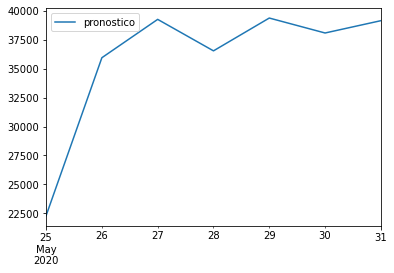

In [48]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [49]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,42126,22291
2020-05-26,45321,35948
2020-05-27,46185,39263
2020-05-28,47441,36542
2020-05-29,48454,39378
2020-05-30,40358,38086
2020-05-31,29599,39150


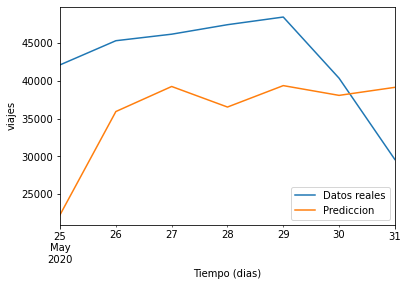

In [50]:
compara['real'].plot()
compara['prediccion'].plot()
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes", fontsize = 10)
plt.legend( ('Datos reales', 'Prediccion'), loc = 'lower right')

In [51]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 9704.00 MAE
Resultado del test: 118105714.29 MSE
Resultado del test: 10867.65 RMSE
Resultado del test: 30.35 CVRMSE
Resultado del test: 30.85 MAPE


In [52]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 19835.00 MAE
Resultado del test dia 1: 393427225.00 MSE
Resultado del test dia 1: 19835.00 RMSE
Resultado del test dia 1: 88.98 CVRMSE
Resultado del test dia 1: 88.98 MAPE 

Resultado del test dia 2: 9373.00 MAE
Resultado del test dia 2: 87853129.00 MSE
Resultado del test dia 2: 9373.00 RMSE
Resultado del test dia 2: 26.07 CVRMSE
Resultado del test dia 2: 26.07 MAPE 

Resultado del test dia 3: 6922.00 MAE
Resultado del test dia 3: 47914084.00 MSE
Resultado del test dia 3: 6922.00 RMSE
Resultado del test dia 3: 17.63 CVRMSE
Resultado del test dia 3: 17.63 MAPE 

Resultado del test dia 4: 10899.00 MAE
Resultado del test dia 4: 118788201.00 MSE
Resultado del test dia 4: 10899.00 RMSE
Resultado del test dia 4: 29.83 CVRMSE
Resultado del test dia 4: 29.83 MAPE 

Resultado del test dia 5: 9076.00 MAE
Resultado del test dia 5: 82373776.00 MSE
Resultado del test dia 5: 9076.00 RMSE
Resultado del test dia 5: 23.05 CVRMSE
Resultado del test dia 5: 23.05 MAPE 

Resultado